### Assignment 10.2

### Using listings 6.16, 6.17, and 6.18 in Deep Learning with Python as a guide, train a sequential model with embeddings on the IMDB data found in data/external/imdb/. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

Epoch 1/10
625/625 [==============================] - 7s 10ms/step - loss: 0.4371 - accuracy: 0.7925 - val_loss: 0.4985 - val_accuracy: 0.7798
Epoch 2/10
625/625 [==============================] - 6s 10ms/step - loss: 0.2182 - accuracy: 0.9164 - val_loss: 0.4261 - val_accuracy: 0.8240
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 0.1261 - accuracy: 0.9589 - val_loss: 0.5114 - val_accuracy: 0.8032
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0576 - accuracy: 0.9876 - val_loss: 0.4958 - val_accuracy: 0.8262
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0241 - accuracy: 0.9963 - val_loss: 0.7626 - val_accuracy: 0.7668
Epoch 6/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0100 - accuracy: 0.9988 - val_loss: 0.7724 - val_accuracy: 0.7760
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.0051 - accuracy: 0.9995 - val_loss: 0.7715 - val_accuracy: 0.7956


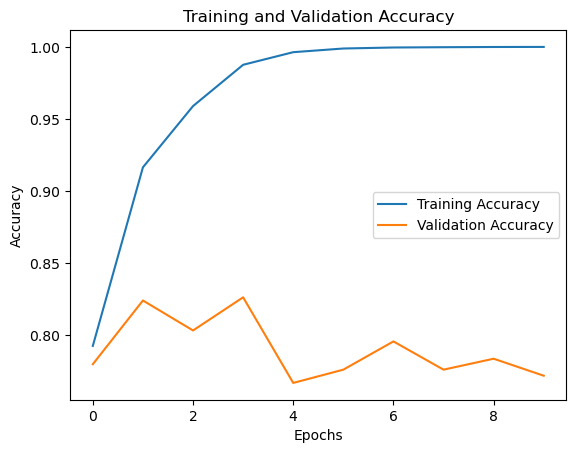

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

# Set the paths to the train and test datasets
train_dir = 'C:/Users/chris/DSC650-T301/dsc/dsc650/data/external/imdb/aclImdb/train'
test_dir = 'C:/Users/chris/DSC650-T301/dsc/dsc650/data/external/imdb/aclImdb/test'

# Load the train dataset
train_texts = []
train_labels = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname.endswith('.txt'):
            with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                train_texts.append(f.read())
            train_labels.append(0 if label_type == 'neg' else 1)

# Load the test dataset
test_texts = []
test_labels = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname.endswith('.txt'):
            with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                test_texts.append(f.read())
            test_labels.append(0 if label_type == 'neg' else 1)

# Tokenize the text data
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad the sequences
maxlen = 200
x_train = pad_sequences(train_sequences, maxlen=maxlen)
x_test = pad_sequences(test_sequences, maxlen=maxlen)
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# Build the model
embedding_dim = 100
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile and train the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
